In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from getdist import plots, loadMCSamples
from natsort import os_sorted
import copy
from utils import load_data, symlog, normalize, loglkl_norm

# Use this script to plot spectra in the training data

In [6]:
def get_spectra(folder):
    # folder should point to a cleaned data folder
    # each entry in the spectra dict has spectrum type of key
    # and the corresponding values are dicts with entries 'loglkl' and 'cl'
    # where 'cl' is an np.array of shape (N_data_points, N_ell) and loglkl
    # is a vector of shape (N_data_points, )
    spectra = {}
    for file in os_sorted(os.listdir(folder)):
        filename = f"{folder}/{file}"
        if file.find('.cl') != -1:
            if not file.endswith('.clell'):
                spectrum_type = file[file.find('.cl') + 3:]
                idx = int(file[file.find('.cl') - 1])
                if idx > 1:
                    raise RunTimeError(f"Your data folder is not cleaned! Exiting.")
                else:
                    data = np.genfromtxt(filename)
                    spectra[spectrum_type] = {}
                    spectra[spectrum_type]['loglkl'] = data[:, 0]
                    spectra[spectrum_type]['cls'] = data[:, 3:]
            else:
                ell = np.genfromtxt(filename)
                spectra['ell'] = ell[2:]
       
    for typ in spectra.keys(): # normalize spectra
        if typ != 'ell':
            spectra[typ]['cls'] = spectra[typ]['cls']*spectra['ell']*(spectra['ell'] + 1)/2./np.pi
    return spectra

def normalized_spectra(folder, method=2):
    data, loglkl, spectrum_types, ell = load_data(folder)
    data, means, sigmas = normalize(data, method=method)
    spectra = get_spectra(folder)
    for idx_spec, typ in enumerate(spectrum_types):
        spectra[typ]['cls_normalized'] = [data[pt, idx_spec, :] for pt in range(len(data[:, idx_spec, 0]))]
    return spectra

def get_paramspace(folder):
    # plots a triangle plot of the points in parameterspace visited by the MCMC chain that produced the data 
    analysis = {
        'smooth_scale_2D': 1.1,
        'ignore_rows':0
    }
    
    samples = loadMCSamples(folder, settings=analysis)
    #g = plots.get_single_plotter()
    #g.plot_2d(samples, ["omega_b", "omega_cdm"])
    #g.plot_2d_scatter(samples, "omega_b", "omega_cdm")
    g = plots.get_subplot_plotter()
    g.triangle_plot(samples, filled=True)

## End of function definitions

In [8]:
%%time
file = "data/lkl_data_highl_tt_lite_only"
specs = normalized_spectra(file, method=2)
#specs_method1 = normalized_spectra(file, method=1)

Reading 2022-09-24_1000000000000__1.clell
Reading 2022-09-24_1000000000000__1.cltt
CPU times: user 23.7 s, sys: 2.51 s, total: 26.2 s
Wall time: 27.2 s


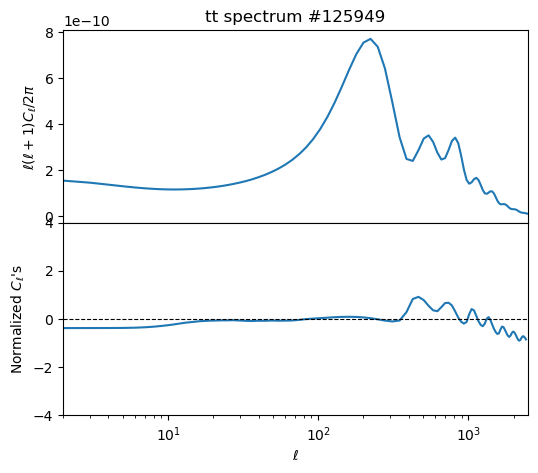

In [12]:
spectrum_type = 'tt'
plot_idx = np.random.randint(0, high=len(specs[spectrum_type]['cls']))

fig, ax = plt.subplots(2,1, figsize=[6, 5])
ax[0].set_title(f"{spectrum_type} spectrum #{plot_idx}")
ax[0].set(ylabel=r'$\ell(\ell + 1)C_\ell/2\pi$', xscale='log', xlim=[2, 2500])
ax[1].set(xlabel=r'$\ell$', ylabel="Normalized $C_\ell$\'s", xscale='log', xlim=[2, 2500])
ax[1].set(ylim=[-4, 4])
ax[0].plot(specs['ell'], specs[spectrum_type]['cls'][plot_idx])
ax[1].plot(specs['ell'][:-2], specs[spectrum_type]['cls_normalized'][plot_idx])
#ax[1].plot(specs['ell'], specs_method1[spectrum_type]['cls_normalized'][plot_idx])
ax[1].plot(specs['ell'], np.zeros(len(specs['ell'])), 'k--', lw=0.8)
fig.subplots_adjust(hspace=0.0)

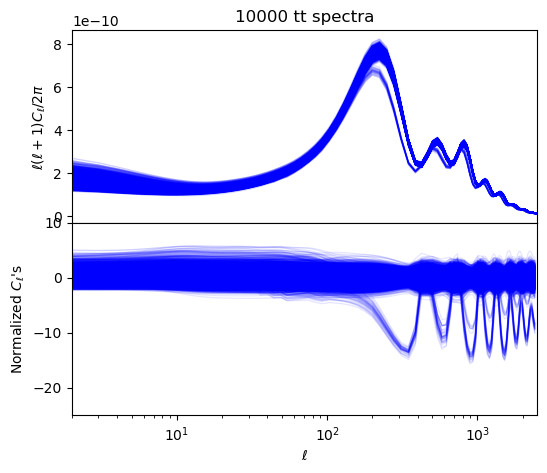

In [20]:
spectrum_type = 'tt'
N_plots = 10000
indices = np.random.randint(0, high=len(specs[spectrum_type]['cls']), size=N_plots)

fig, ax = plt.subplots(2,1, figsize=[6, 5])
ax[0].set_title(f"{N_plots} {spectrum_type} spectra")
ax[0].set(ylabel=r'$\ell(\ell + 1)C_\ell/2\pi$', xscale='log', xlim=[2, 2500])
ax[1].set(xlabel=r'$\ell$', ylabel="Normalized $C_\ell$\'s", xscale='log', xlim=[2, 2500])
ax[1].set(ylim=[-25, 10])
for i in indices:
    ax[0].plot(specs['ell'], specs[spectrum_type]['cls'][i], color='b', alpha=0.1, lw=0.1)
    #ax[1].plot(specs['ell'], specs_method1[spectrum_type]['cls_normalized'][i], color='b', alpha=0.1, lw=0.1)
    ax[1].plot(specs['ell'][:-2], specs[spectrum_type]['cls_normalized'][i], color='b', alpha=0.1, lw=0.1)
fig.subplots_adjust(hspace=0.0)

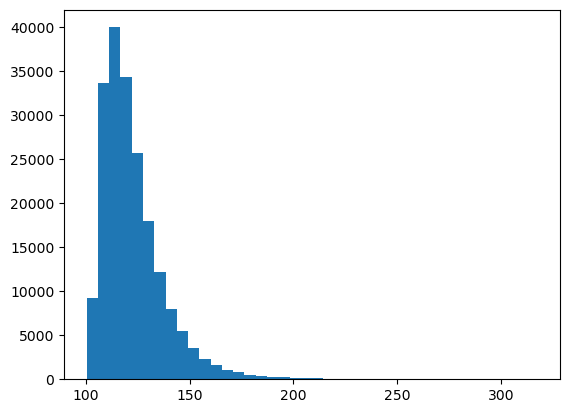

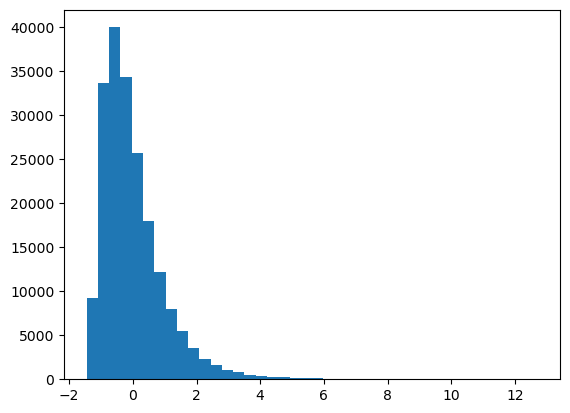

In [19]:
asdf = plt.hist(specs[spectrum_type]['loglkl'], bins=40)
#plt.yscale('log')

plt.figure()
normed, m, s = loglkl_norm(specs[spectrum_type]['loglkl'])
asdf = plt.hist(normed, bins=40)

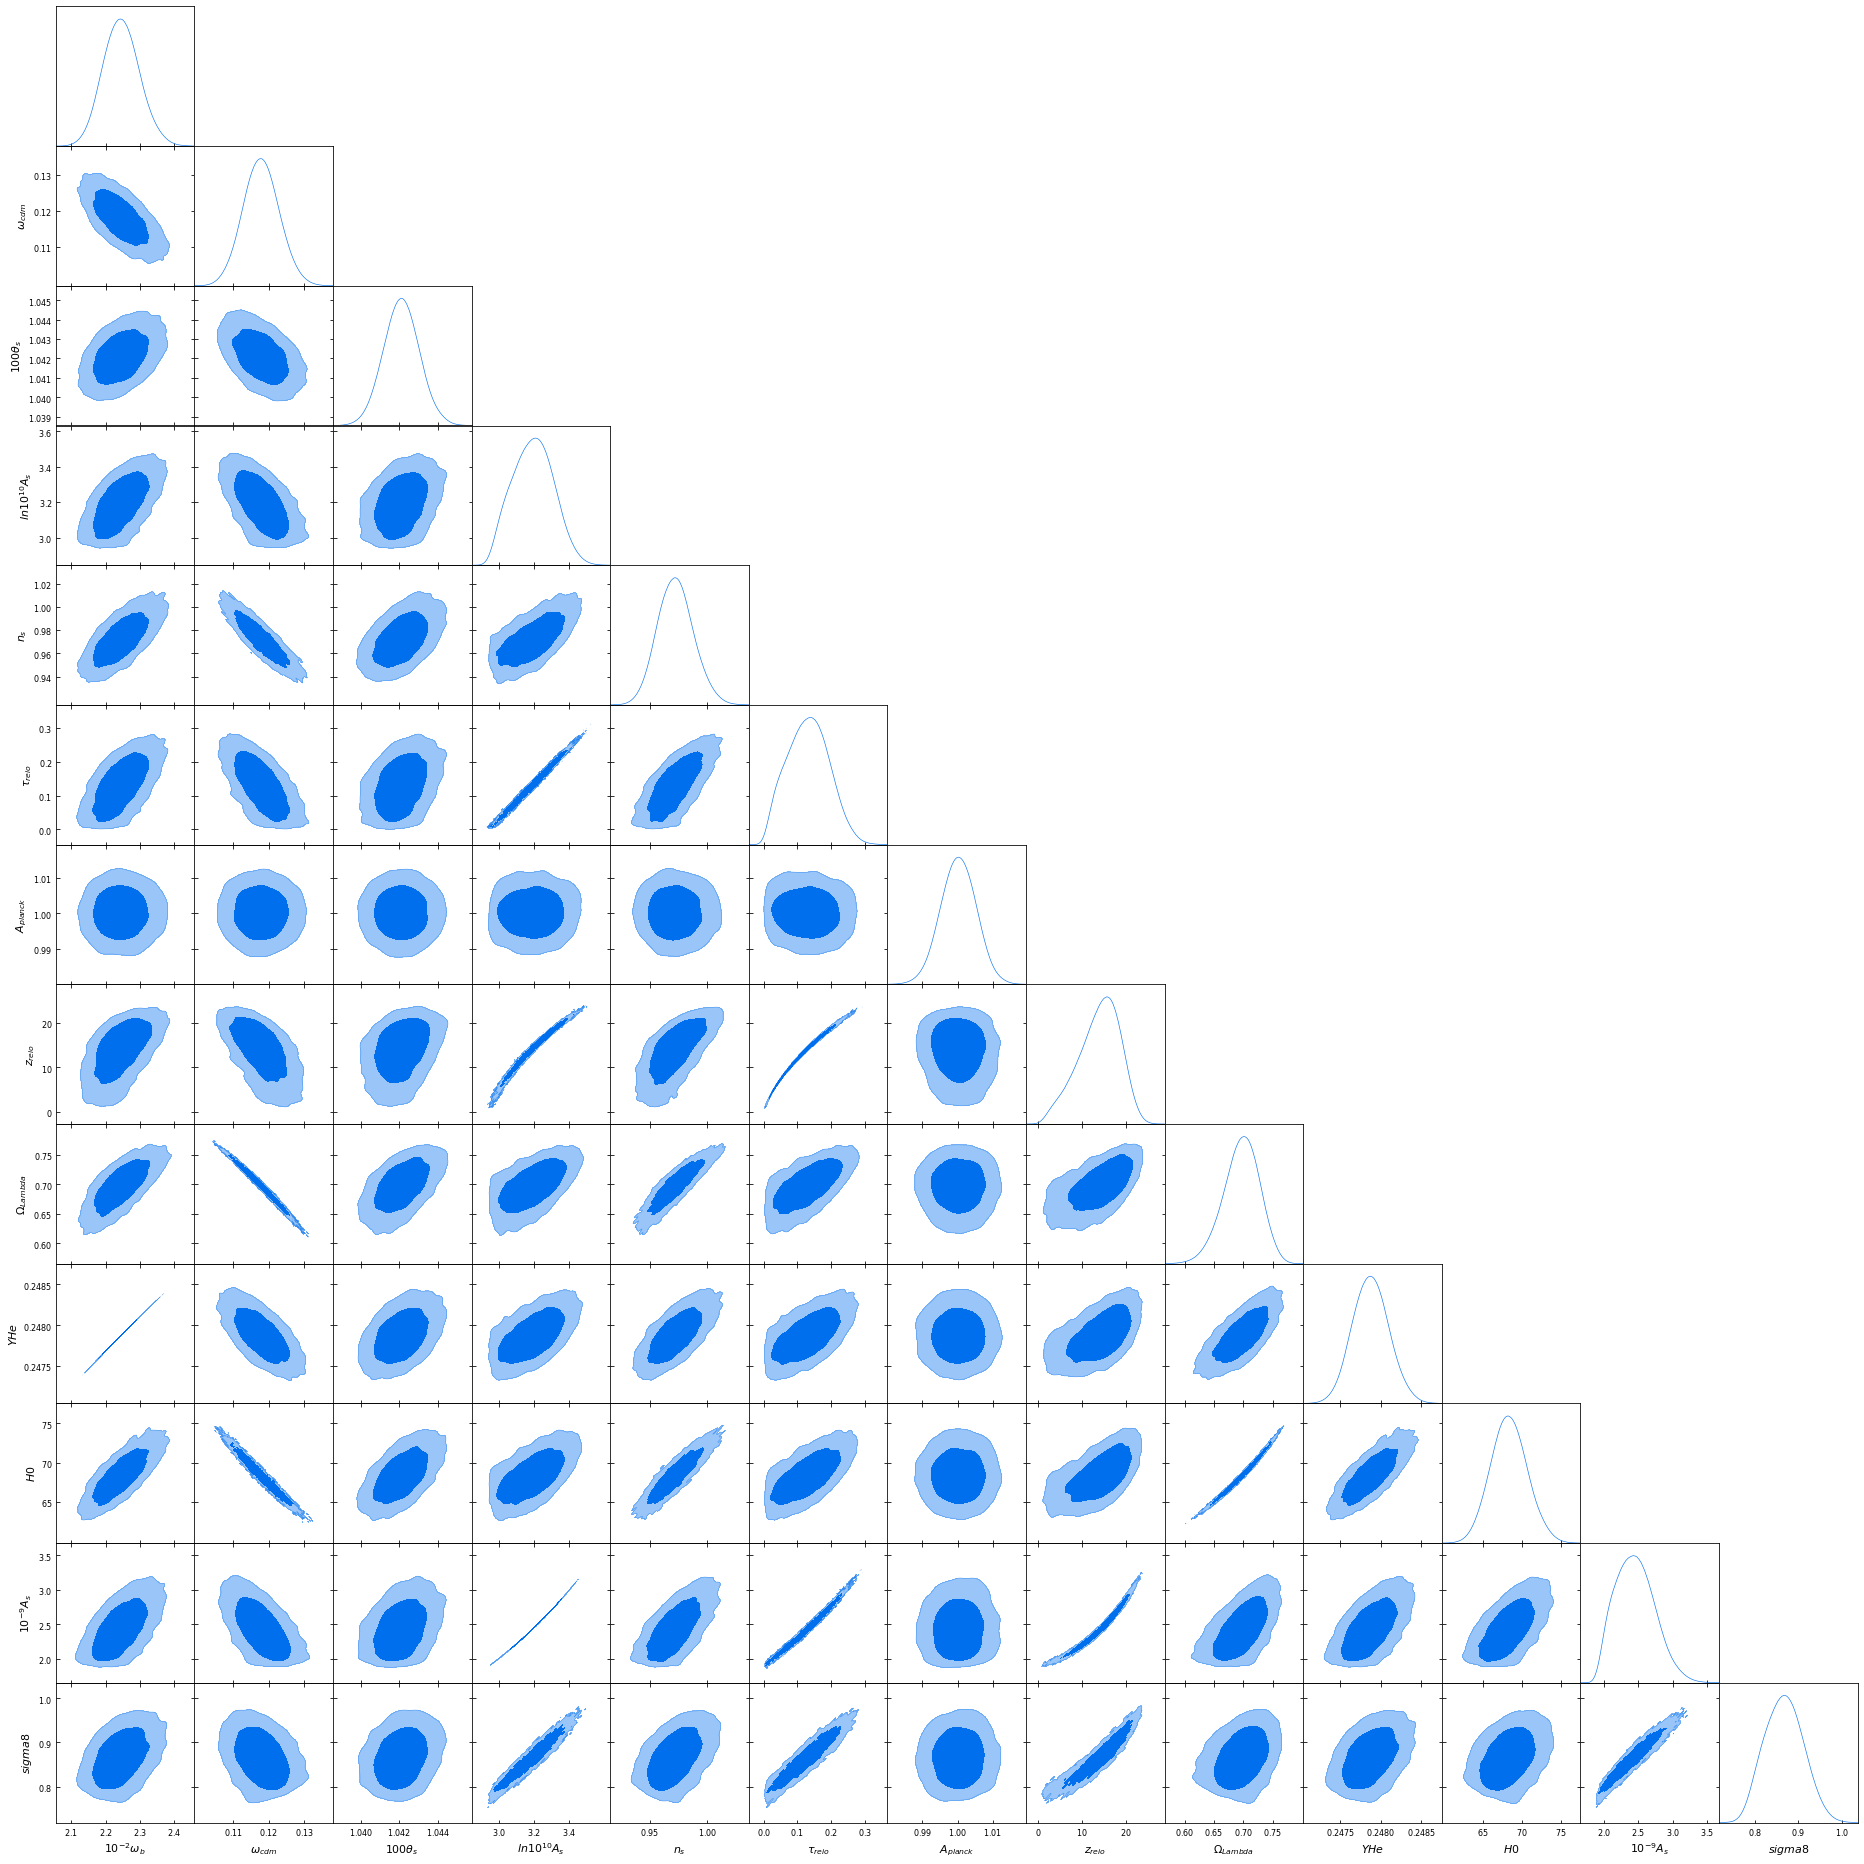

In [5]:
file = "data/lkl_data_highl_tt_lite_backup/2022-09-24_1000000000000_"
get_paramspace(file)